# Probability Estimation Theory

Throughout Chapter 5, we spent a lot of attention developing intuition for many of the network models that are essential to understanding random networks. Recall that the notation that we use for a random network (more specifically, a network-valued random variable), $\mathbf A$, does *not* refer to any network we could ever hope to see (or as we introduced in the previous chapter, *realize*) in the real world. This issue is extremely important in network machine learning, so we will try to drive it home one more time: no matter how much data we collected (unless we could get infinite data, which we *can't*), we can never hope to understand the true distribution of $\mathbf A$. As network scientists, this leaves us with a bit of a problem: what, then, can we do to make useful claims about $\mathbf A$, if we can't actually see $\mathbf A$ nor its distribution?

This is where statistics, particularly, **estimation**, comes into play. At a very high level, estimation is a procedure to calculate properties about a random variable (or a set of random variables) using *only* the data we are given: finitely many (in network statistics, often just *one*) samples which we assume are *realizations* of the random variable we want to learn about. The properties of the random variable that we seek to learn about are called **estimands**, and  In the case of our network models, in particular, we will attempt to obtain reasonable estimates of the parameters (our *estimands*) associated with random networks.

The most useful property that we will leverage which was developed in Chapter $5$ is the independent-edge assumption. As we discussed, when working with independent-edge random network models, we will assume that edges in our random network are *independent*. This means that the probability of observing a particular realization of a random network is, in fact, the product of the probabilities of observing each edge in the random network. Notationally, what this means is that if $\mathbf A$ is a random network with $n$ nodes and edges $\mathbf a_{ij}$, and $A$ is a realization of that random network with edges $a_{ij}$, then:
\begin{align*}
    \mathbb P_\theta(\mathbf A = A) &= \mathbb P(\mathbf a_{11} = a_{11}, \mathbf a_{12} = a_{12}, ..., \mathbf a_{nn} = a_{nn}), \\
    &= \prod_{i, j} \mathbb P_\theta(\mathbf a_{ij} = a_{ij}).
\end{align*}
In the special case where our networks are simple (undirected and loopless), this simplifies to:
\begin{align*}
    \mathbb P_\theta(\mathbf A = A) &= \prod_{i < j} \mathbb P_\theta(\mathbf a_{ij} = a_{ij}).
\end{align*}
for any network realization $A$ which is simple. This is because if $\mathbf a_{ij} = a$, then we also know that $\mathbf a_{ji} = a$, and we only need to worry about one of the edges (we chose the edges in the upper right triangle of the adjacency matrix arbitrarily).  Further, since $A$ is also simple, then we know hat $\mathbf a_{ii} = 0$; that is, no nodes have loops, so we don't need to worry about the case where $i = j$ either.

We will set the scene for the later examples using a common example. Let's say we flip a coin $10$ times, and see $6$ heads. What is the probability that the coin lands on heads? Intuitively, the answer is rather simple! It feels like it should just be $\frac{6}{10}$. And in one particular way, that really is the *best* guess we could make!

Below, we discuss the nitty-gritty technical details of how we learn about random networks using a particular method known as Maximum Likelihood Estimation (MLE). Maximum likelihood estimation is why $\frac{6}{10}$ is a great guess for our coin flip example. Finding MLEs can be pretty difficult, so we leave the details in starred sections. If you aren't familiar with MLE, you can skip these, and still learn how to use the results!

## The Method of Maximum Likelihood Estimation (MLE)

Let's think about what exactly this means using an example that you are likely familiar with. I have a single coin, and I want to know the probability of the outcome of a roll of that coin being a heads. For sake of argument, we will call this coin *fair*, which means that the true probability it lands on heads (or tails) is $0.5$. In this case, I would call the outcome of the $i^{th}$ coin flip the random variable $\mathbf x_i$, and it can produce realizations which take one of two possible values: a heads (an outcome of a $1$) or a tails (an outcome of a $0$). We will say that we see $10$ total coin flips. We will number these realizations as $x_i$, where $i$ goes from $1$ to $10$. To recap, the boldfaced $\mathbf x_i$ denotes the random variable, and the unbolded $x_i$ denotes the realization which we actually see. Our question of interest is: how do we estimate the probability of the coin landing on a heads, if we don't know anything about the true probability value $p$, other than the outcomes of the coin flips we got to observe?

Here, since $\mathbf x_i$ takes the value $1$ or $0$ each with probability $0.5$, we would say that $\mathbf x_i$ is a $Bernoulli(0.5)$ random variable. This means that the random variable $\mathbf x$ has the Bernoulli distribution, and the probability of a heads, $p$, is $0.5$. All $10$ of our $\mathbf x_i$ are called *identically distributed*, since they all have the same $Bernoulli(0.5)$ distribution.

We will also assume that the outcomes of the coin flips are mutually independent, which is explained in the terminology section.

For any one coin flip, the probability of observing the outcome $i$ is, by definition of the Bernoulli distribution:
\begin{align*}
    \mathbb P_\theta(\mathbf x_i = x_i) = p^{x_i} (1 - p)^{1 - x_i}.
\end{align*}
Note that we use the notation $\mathbb P_\theta$ to indicate that the probability is a function of the parameter set $\theta$ for the random variable $\mathbf x_i$. Here, since the only parameter for each $\mathbf x_i$ is a probability $p$, then $\theta = p$.

If we saw $n$ total outcomes, the probability is, using the definition of mutual independence:
\begin{align*}
    \mathbb P_\theta(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \prod_{i = 1}^{n}\mathbb P(\mathbf x_i = x_i), \\
    &= \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}, \\
    &= p^{\sum_{i = 1}^n x_i}(1 - p)^{n - \sum_{i = 1}^n x_i}.
\end{align*}
What if we saw $10$ coin flips, and $6$ were heads? Can we take a "guess" at what $p$ might be? Intuitively your first reaction might be to say a good guess of $p$, which we will abbreviate $\hat p$, would be $0.6$, which is $6$ heads of $10$ outcomes. In many ways, this intuitive guess is spot on. However, in network machine learning, we like to be really specific about why, exactly, this guess makes sense. 

Looking at the above equation, one thing we can do is use the technique of **maximum likelihood estimation**. We call the function $\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p)$ the *likelihood* of our sequence, for a given value of $p$. Note that we have added the term "$; p$" to our notation, which is simply to emphasize the dependence of the likelihood on the probability. So, what we *really* want to do is find the value that $p$ could take, which *maximizes* the likelihood. Let's see what the likelihood function looks like as a function of different values of $p$:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p = np.linspace(.02, .98, num=49)
nflips = 10; nheads = 6
likelihood = p**(nheads)*(1 - p)**(nflips - nheads)

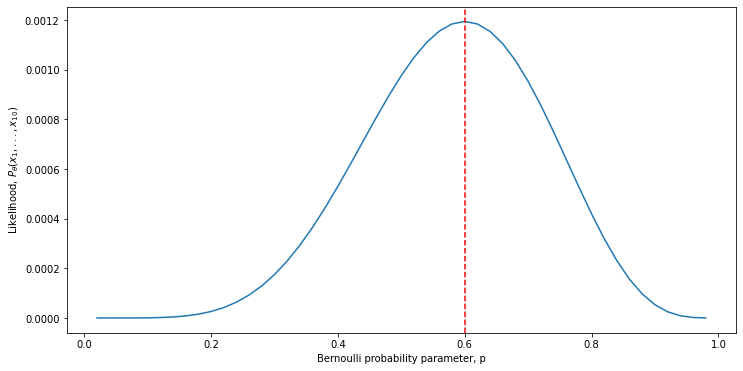

In [2]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=p, y=likelihood, ax=ax)
ax.axvline(.6, color="red", linestyle="--")
ax.set(xlabel="Bernoulli probability parameter, p", ylabel="Likelihood, $P_{\\theta}(x_1, ..., x_{10})$")
ax;

As we can see, it turns out that our intuitive answer, that $p=0.6$, is in fact the Maximum Likelihood Estimate for the Bernoulli probability parameter $p$. Now how do we go about showing this rigorously?

An easier problem, we often will find, is to instead maximize the *log likelihood* rather than the likelihood itself. This is because the log function is *monotone*, which means that if $\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_1) < \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_2)$, then $\log\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_1) < \log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_2)$ as well for some choices $p_1$ and $p_2$. Without going too down in the weeds, the idea is that the $\log$ function does not change any critical points of the likelihood. The log likelihood of the above expression is:
\begin{align*}
\log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \log \left[p^{\sum_{i = 1}^n x_i}(1 - p)^{n - \sum_{i = 1}^n x_i}\right], \\
&= \sum_{i = 1}^n x_i \log(p) + \left(n - \sum_{i = 1}^n x_i\right)\log(1 - p).
\end{align*}
And visually, the log-likelihood now looks instead like this:

In [3]:
loglikelihood = nheads*np.log(p) + (nflips - nheads)*np.log(1 - p)

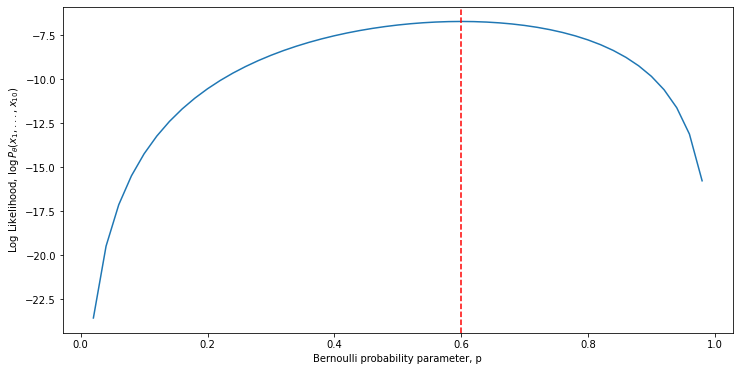

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=p, y=loglikelihood, ax=ax)
ax.axvline(.6, color="red", linestyle="--")
ax.set(xlabel="Bernoulli probability parameter, p", ylabel="Log Likelihood, $\\log P_{\\theta}(x_1, ..., x_{10})$")
ax;

Although we can see that the two plots look *almost* nothing alike, the key is the word *almost* here. Notice that the absolute maximum is, in fact, the same regardless of whether we use the likelihood or the log-likelihood. Further, notice that at the maximum, the slope of the tangent line is $0$. You may recall from calculus that this is how we typically go about finding a critical point of a function. Now, let's get make our argument a little more technical. Remembering from calculus $1$ and $2$, to find a maximal point of the log-likelihood function with respect to some variable $p$, our process looks like this:
1. Take the derivative of the log-likelihood with respect to $p$,
2. Set it equal to $0$ and solve for the critical point $\tilde p$,
3. Verify that the critical point $\tilde p$ is indeed an estimate of a maximum, $\hat p$. 

Proceeding using the result we derived above, and using the fact that $\frac{d}{du} \log(u) = \frac{1}{u}$ and that $\frac{d}{du} \log(1 - u) = -\frac{1}{1 - u}$:
\begin{align*}
\frac{d}{d p}\log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \frac{\sum_{i = 1}^n x_i}{p} - \frac{n - \sum_{i = 1}^n x_i}{1 - p} = 0, \\
\Rightarrow \frac{\sum_{i = 1}^n x_i}{p} &= \frac{n - \sum_{i = 1}^n x_i}{1 - p}, \\
\Rightarrow (1 - p)\sum_{i = 1}^n x_i &= p\left(n - \sum_{i = 1}^n x_i\right), \\
\sum_{i = 1}^n x_i - p\sum_{i = 1}^n x_i &= pn - p\sum_{i = 1}^n x_i ,\\
\Rightarrow \tilde p &= \frac{1}{n}\sum_{i = 1}^n x_i.
\end{align*}
We use the notation $\tilde p$ here to denote that $\tilde p$ is a critical point of the function.

Finally, we must check that this is an estimate of a maximum, which we can do by taking the second derivative and checking that the second derivative is negative. We will omit this since it's a bit intricate and tangential from our argument, but if you work it through, you will find that the second derivative is indeed negative at $\tilde p$. This means that $\tilde p$ is indeed an estimate of a maximum, which we would denote by $\hat p$.

Finally, using this result, we find that with $6$ heads in $10$ outcomes, we would obtain an estimate:
\begin{align*}
    \hat p &= \frac{6}{10} = 0.6.
\end{align*}
which exactly aligns with our intuition.

So, why do we need estimation tools, if in our example, our intuition gave us the answer a whole lot faster? Unfortunately, the particular scenario we described was one of the *simplest possible examples* in which a parameter requires estimation. As the scenario grows more complicated, and *especially* when we extend to network-valued data, figuring out good ways to estimate parameters is extremely difficult. For this reason, we will describe some tools which are very relevant to network machine learning to learn about network parameters.

### MLE for ER

In Chapter 5, we explored the derivation for the probability of observing a realization $A$ of a given random network $\mathbf A$ which is ER, which is equivalent to the likelihood of $A$. Recall this was:

\begin{align*}
    \mathbb P_\theta(A) &= p^{m} \cdot (1 - p)^{\binom{n}{2} - m}.
\end{align*}

where $m = \sum_{i < j} a_{ij}$ is the total number of edges in the observed network $A$. Our approach here parallels directly the approach for the coin; we begin by taking the log of the probability:

\begin{align*}
    \log \mathbb P_\theta(A) &= \log \left[p^{m} \cdot (1 - p)^{\binom{n}{2} - m}\right], \\
    &= m \log p + \left(\binom n 2 - m\right)\log (1 - p).
\end{align*}

Next, we take the derivative with respect to $p$, set equal to $0$, and we end up with:
\begin{align*}
\frac{d}{d p}\log \mathbb P_\theta(A) &= \frac{m}{p} - \frac{\binom n 2 - m}{1 - p} = 0, \\
\Rightarrow \tilde p &= \frac{m}{\binom n 2}.
\end{align*}
We omitted several detailed steps due to the fact that we show the rigorous derivation above. Checking the second derivative, which we omit since it is rather mathematically tedious, we see that the second derivative at $\tilde p$ is negative, so we indeed have found an estimate of the maximum, and will be denoted by $\hat p$. This gives that the Maximum Likelihood Estimate (or, the MLE, for short) of the probability $p$ for a random network $\mathbf A$ which is ER is:

\begin{align*}
    \hat p &= \frac{m}{\binom n 2}.
\end{align*}

#### Unbiasedness of the estimate of the probability parameter for the ER network

If we were to repeat our experiment again and again, getting a new network each time, it would be great if our estimate of the probability were, on average, the correct value, right? This core idea underlies the concept of the *unbiasedness* of an estimate in statistical theory. An estimator is **unbiased** for an underlying parameter if it can be expected to attain that parameter using *only* the sample data. For this section, we'll change our notation up slightly; we'll use the term $\hat p_n$ to mean the probability estimate we produce for a realization with $n$ nodes. In this case for the probability parameter, what this means is that $\mathbb E[\hat p_n] = p$, or that we would expect our estimate of the probability $\hat p_n$ to be equal to the true probability $p$. The reason we introduce the subscript $n$ is to emphasize *really* strongly that the expected value is for a *particular* number of nodes which is *totally arbitrary*.

Before we get started on deciding how to attack this problem, we should first specify what unbiasedness is *not* to give you some more intuition. What unbiasedness does *not* say is that the estimate $\hat p_n$ itself is equal to the probability $p$. This means we wouldn't expect, in general, for our estimate to be exactly equal to the true parameter we are trying to estimate. All that it says is, if the underlying random network $\mathbf A$ can be *truly* described by the $ER_n(p)$ random network, and if our realization $A$ is really a realization of $\mathbf A$, that the estimate we would produce from our data $A$ would be equal to the probability parameter that $\mathbf A$ has. If an estimator is unbiased, this would mean that if we looked at a bunch of realizations of $\mathbf A$, that on average, the estimates would equal the true parameter of $A$. Stated another way, if we had infinite realizations of $\mathbf A$, and then for each of these realizations of $A$ we computed an estimate of the probability $\hat p$, that the average of *those* estimates would be $p$.

What nuances do we need to consider? Well, first of all, our realization $A$ comes down to *random chance* (due to the fact that it is a realization of a random variable $\mathbf A$), so our expected value will not be the expected value of the realization itself (since the realization just *is* or *is not* a particular value), but the expected value of the underlying *random* quantities. For instance, The estimate of $\hat p_n$ has some underlying random quantity $\mathbf {\hat p}_n$. This quantity describes how the *estimates of the probabilities* would behave if the underlying random network was $ER_n(p)$. So all of the quantities that are *not* parameters of the underlying statistical model (in this case, the number of nodes and the probability $p$) will be random variables here, since *only* $n$ and $p$ determine the underlying random system we got to realize.

So, how do we get started here? Well, we begin with just writing down what we know so far. The expected value of the estimate of the probability is obviously equal to the expected value of the equation we have above, since the estimate of the probability is equal to this thing:
\begin{align*}
    \mathbb E[\mathbf{\hat p}_n] &= \mathbb E\left[\frac{\mathbf m}{\binom n 2}\right] .
\end{align*}
Next, as we can see since $\mathbb A$ has $n$ nodes (it is an $ER_n(p)$ random network), then $\frac{1}{\binom n 2}$ is just a constant, so we can pull this out front:
\begin{align*}
    \mathbb E[\mathbf{\hat p}_n] &= \frac{1}{\binom n 2}\mathbb E[\mathbf m].
\end{align*}
Remember that we defined $m$ to be $\sum_{i < j} a_{ij}$, so now let's plug that in here, but where $m$ and $a_{ij}$ are now random variables (so they are bold faced):
\begin{align*}
    \mathbb E[\mathbf m] &= \mathbb E\left[\sum_{i < j}\mathbf a_{ij}\right].
\end{align*}
Next, we use the fact that the expected value of a finite sum is the sum of the expected values:
\begin{align*}
    \mathbb E\left[\sum_{i < j}\mathbf a_{ij}\right] &= \sum_{i < j}\mathbb E[\mathbf a_{ij}].
\end{align*}

Next, we use the underlying statistical model that we have. We remember that *every* edge in an ER random network $\mathbf a_{ij}$ is like a coin flip with a probability of landing on heads of $p$, so there is nothing really unique about any particular edge. This means that the sum is really a sum of quantities which will have the *same* expected value, so since there are $\binom n 2$ possible edges where $i < j$, then:
\begin{align*}
    \mathbb E\left[\sum_{i < j}\mathbf a_{ij}\right] &= \binom n 2\mathbb E[\mathbf a_{ij}].
\end{align*}
Finally, we'll use a thing called the law of total expectation, which basically says that the expected value of a random variable is the (probability weighted) average of the possible values that random variable could take. This means that since $\mathbf a_{ij}$ can only take values of $0$s and $1$s, that the expected value is:
\begin{align*}
    \mathbb E[\mathbf a_{ij}] &= 1 \cdot Pr(\mathbf a_{ij} = 1) + 0 \cdot Pr(\mathbf a_{ij} = 0), \\
    &= 1 \cdot p + 0 \cdot (1 - p) = p.
\end{align*}
Putting this together gives us that:
\begin{align*}
    \mathbb E[\mathbf m] &= \binom n 2 p,
\end{align*}
and taking this a step further:
\begin{align*}
    \mathbb E[\mathbf{\hat p}] &= \frac{1}{\binom n 2}\binom n 2 p = p,
\end{align*}
so our estimator $\hat p$ is unbiased!

##### Showing Unbiasedness with simulations

We can show this property numerically very simply. What we will use to show this is called a *parameteric bootstrap*. What the heck is that?

The use behind a parametric bootstrap is, we have some random quantity which we think follows a particular distribution (e.g., it is a *parametric quantity*, or a random variable with a particular parameter), and we want to see what some *function* of that random variable looks like when we manipulate it in a way which makes the distribution a *lot* harder to work with! For instance, if we had a random variables $\mathbf x$ and $\mathbf y$ which followed a normal distribution with mean $0$, variance $1$, and were independent, we might not know off the top of our heads that $\mathbf x^2 + \mathbf y^2$ was chi-squared distributed with $2$ degree of freedoms. However, if we did a parametric bootstrap, we could still take a guess at properties about $\mathbf x^2 + \mathbf y^2$ just by simulating it. We begin by simulating 1000 realizations of $\mathbf x$ and $\mathbf y$, and then looking at how the squares of these realizations behave:

In [5]:
import scipy as sp

# simulation of 1000 values from the N(0,1) distn
n = 1000
xs = np.random.normal(loc=0, scale=1, size=n)
ys = np.random.normal(loc=0, scale=1, size=n)
# compute the square
xssq = xs**2
yssq = ys**2
sum_xsq_ysq = xssq + yssq

# compute the centers for bin histograms from 0 to maxval in
# 30 even bins
nbins = 30
bincenters = np.linspace(start=0, stop=np.max(sum_xsq_ysq), num=nbins)

# compute the pdf of the chi-squared distribution for X^2 + Y^2, which when
# X, Y are N(0, 1), is Chi2(2), the chi-squared distn with 2 degrees of freedom
dof = 2
true_pdf = sp.stats.chi2.pdf(bincenters, dof)

Next, we plot a normalized histogram of `sum_xsq_ysq` (blue bars) against the true distribution of $\mathbf x^2 + \mathbf y^2$ (red line). For the histograms, these will correspond to the approximate densities of $\mathbf x^2 + \mathbf y^2$, and for the red line, this is the *exact* density of $\mathbf x^2 + \mathbf y^2$. What we will see is that they align virtually perfectly:

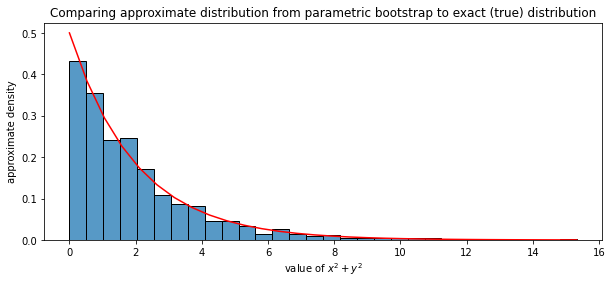

In [19]:
from pandas import DataFrame
fig, ax = plt.subplots(1,1, figsize=(10, 4))

df = DataFrame({"x": bincenters, "y": true_pdf})
sns.histplot(sum_xsq_ysq, bins=30, ax=ax, stat = "density")
sns.lineplot(x="x", y="y", data=df, ax=ax, color="red")
ax.set_xlabel("value of $x^2 + y^2$")
ax.set_ylabel("approximate density")
ax.set_title("Comparing approximate distribution from parametric bootstrap to exact (true) distribution");

If we wanted to compute the mean of $\mathbf x^2 + \mathbf y^2$, for instance, we can approximate it using the points we sampled, and don't even have to worry about the (extensive) amount of mathematics to obtain the true distribution of $\mathbf x^2 + \mathbf y^2$ as $\chi^2$ with 2 degrees of freedom:

In [20]:
print("Approximate mean: {:2f}".format(np.mean(sum_xsq_ysq)))
print("True mean: {:2f}".format(2))

Approximate mean: 1.978834
True mean: 2.000000


When the random quantities are networks, and particularly, *functions* of those networks, this gets even *more* tedious very fast. For this reason, this technique for *parametric bootstrap* is going to be very valuable as we develop intuition for how to demonstrate (empirically) many of the results we will see later.

Remember that the idea is that, for a particular choice of $n$, we will obtain a distribution for the probability parameter, $\mathbf{\hat p}_n$. To do so, we will simulate $100$ network realizations of $\mathbf A$ which are $ER_{20}(0.4)$ (the number of nodes $n$ is $20$ and the probability is $0.4$). For each of the networks $j$, we will estimate the probability parameter $\hat p^{(j)}$ for the network, and then show (as a histogram) what the $\hat p^{(j)}$s take value-wise. This serves as an *approximation* for the distribution of $\mathbf{\hat p}_{20}$:

In [40]:
import graspologic as gp


n = 10  # number of nodes
nsims = 200  # number of networks to simulate
p = 0.4

As = [gp.simulations.er_np(n, p, directed=False, loops=False) for i in range(0, nsims)]  # realizations
fit_models = [gp.models.EREstimator(directed=False, loops=False).fit(A) for A in As]  # fit ER models
hatps = [model.p_ for model in fit_models]  # the probability parameters

Next, we look at the distribution of $\mathbf{\hat p}_{20}$ by showing a histogram of `hatps`, along with the true probability parameter and the mean of `hatps`, which will show that the estimates of the probability have a mean which is (approximately) the true probability:

Text(0.5, 0, 'Value of estimate of $\\hat p_{20}$')

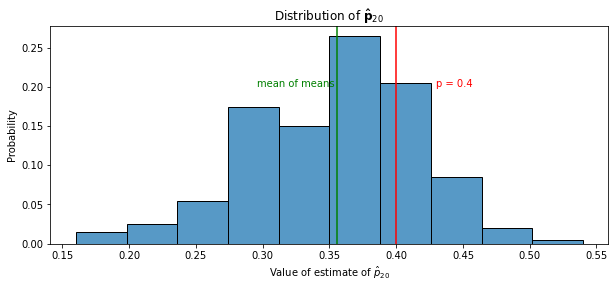

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

sns.histplot(hatps, bins=10, ax=ax, stat="probability")
ax.axvline(np.mean(hatps), color="green")
ax.text(x=np.mean(hatps) - .06, y=.2, s="mean of means", color="green");
ax.axvline(0.4, color="red")
ax.text(x=.43, y=.2, s="p = 0.4", color="red");
ax.set_title("Distribution of $\\mathbf{\\hat p}_{20}$")
ax.set_xlabel("Value of estimate of $\\hat p_{20}$")

As we can see in the above plot, the "mean of means", or the mean of the , is fairly similar to the true mean, $p = 0.4$. If we repeated this experiment with even more simulations than $200$, we would expect this mean of means to be arbitrarily close to $p=0.4$. This empirically exhibits the property of unbiasedness for $\hat p$ that we were able to prove above.

#### Consistency of the estimator of the probability parameter in an ER random network

While the unbiasedness property is great for us, it is important to highlight another limitation of unbiasedness: unbiasedness tells us *only* that if we repeated the experimental setup we had again and again, the average of our estimates of the probability would be the true probability. But there's a caveat: we only conduct our experiment once! We need to know that if we conducted our experiment in a reasonable way (collecting as much data as possible) that our estimate $\hat p$ of the underlying parameter $p$ is reasonable. The property that we care about here is called *asymptotic consistency*, or *consistency* for short. An estimator is **asymptotically consistent** if, as the number of nodes in the network increases, the estimator converges *in probability* to the true underlying parameter. What the heck does this mean?

In a mathematical statement, asymptotic consistency is written that, for any possible choice of $\epsilon$ which exceeds zero, that $Pr(|\mathbf{\hat p}_n - p| > \epsilon) \rightarrow 0$, as the number of nodes grows to infinity. In other words, if we were to see a network which was *big enough*, our estimate of the probability of that network would be *really close* to the true probability of the network $p$.

As it turns out, this really isn't too difficult for us to prove. To prove this statement, we're going to first need the variance of $\mathbf{\hat p}_n$, which we'll see why in a second. Let's get started by plugging in the definition of $\mathbf {\hat p}_n$:
\begin{align*}
var(\mathbf {\hat p}_n) &= var\left(\frac{\mathbf m}{\binom n 2}\right).
\end{align*}
Since the variance of a constant times a random quantity is that constant squared times the variance of the random quantity:
\begin{align*}
var(\mathbf {\hat p}_n) &= \frac{1}{\binom n 2^2}var\left(\mathbf m\right),
\end{align*}
So all we need is the variance of $\mathbf m$, where $\mathbf m$ is defined as $\sum_{i < j}\mathbf a_{ij}$. By definition of an independent edge random graph, the edges are just that: independent. This means that the $\mathbf a_{ij}$s are all independent. The variance of a sum of independent random variables is the sum of the variances, so:
\begin{align*}
var(\mathbf {\hat p}_n) &= \frac{1}{\binom n 2^2}\sum_{i < j}var(\mathbf a_{ij})
\end{align*}
Next, we remember that these edges all have the exact same probability $p$, and therefore, have the same distribution, so their variances will all be identical. This means that the sum is over a bunch of terms with the same value, so the sum will just be the total number of terms we are summing times the value of the variance of any edge in the graph. There are $\binom n 2$ possible edges where $i < j$, so:
\begin{align*}
var(\mathbf {\hat p}_n) &= \frac{1}{\binom n 2^2}\cdot \binom n 2 var(\mathbf a_{ij}) = 
var(\mathbf {\hat p}_n) &= \frac{1}{\binom n 2} var(\mathbf a_{ij}),
\end{align*}
and all we are left to do is compute the variance of $\mathbf a_{ij}$. Remember that the variance is defined as $var(\mathbf x) = \mathbb E[(\mathbf x - \mathbb E[\mathbf x])^2]$. Let's plug this in and see if we get anywhere:
\begin{align*}
var(\mathbf a_{ij}) &= \mathbb E[(\mathbf a_{ij} - \mathbb E[\mathbf a_{ij}])^2].
\end{align*}
Remember that $\mathbb E[\mathbf a_{ij}] = p$, which we learned when showing the consistency of the mean. This means that:
\begin{align*}
var(\mathbf a_{ij}) &= \mathbb E[(\mathbf a_{ij} - p)^2] = \mathbb E[(\mathbf a_{ij}^2 - 2p\mathbf a_{ij} + p^2],
\end{align*}
which if we combine the facts that $p^2$ and $2p$ are constant, and use the fact that the expectation of the sum is the sum of the expectations, we get that:
\begin{align*}
var(\mathbf a_{ij}) &= \mathbb E[(\mathbf a_{ij}^2] - 2p\mathbb E[\mathbf a_{ij}] + p^2 = \mathbb E[(\mathbf a_{ij}^2] - 2p^2 + p^2 =  \mathbb E[(\mathbf a_{ij}^2] - p^2,
\end{align*}
and we are just about finished. We just need the expected value of the square of $\mathbf a_{ij}$, which is called the second moment of $\mathbf a_{ij}$. This term is fortunately easy to calculate too, since we can just use the law of total expectation:
\begin{align*}
 \mathbb E[(\mathbf a_{ij}^2] &= \sum_{a \in\{0, 1\}}a^2 \cdot Pr(\mathbf a_{ij} = a)
\end{align*}
Since $\mathbf a_{ij}$ is $0$ with probability $(1 - p)$ and $1$ with probability $p$, this term is easy, too:
\begin{align*}
 \mathbb E[(\mathbf a_{ij}^2] &= 1^2 \cdot p + 0^2\cdot(1 - p) = p
\end{align*}
And we get that:
\begin{align*}
var(\mathbf a_{ij}) &= p - p^2 = p\cdot (1 - p).
\end{align*}
Now for the cool part. Putting this together for $\mathbf {\hat p}_n$, we get that:
\begin{align*}
var(\mathbf {\hat p}_n) &= \frac{1}{\binom n 2} \cdot p \cdot (1 - p) = \frac{p(1 - p)}{\binom n 2}
\end{align*}
We can turn to a thing called [*Chebyshev's Inequality*](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality). **Chebyshev's Inequality** states that, if $\mathbf x$ is a random variable with a finite mean $\mathbb E[\mathbf x] = \mu$ and a finite variance $\sigma^2$, that, for any value of $k$ that is greater than $0$:
\begin{align*}
    Pr(|\mathbf x - \mu| \geq k\sigma) \leq \frac{1}{k^2}.
\end{align*}
What this statement says is that the probability that the difference between a random quantity and its mean $\mu$ is less than a value ($k\sigma$) can be *upper bounded* (it will be *at most*) $\frac{1}{k^2}$. In statistics, we don't really worry too much about $\geq$ and $\leq$ compared to $>$ and $<$ when a random variable is *continuous* on some interval, so these specifics aren't too important to us here. As we can see, however, this statement looks *really* similar to the one we needed for convergence in probability, and it is, in fact, exactly what we will use to prove convergence in probability. Notice that in this case, $\sigma$ is just a constant (it is a *parameter* of $\mathbf {\hat p}_n$, and parameters are constant), and that this inequality holds true for *any* constant $k > 0$. So what if we pick $k$ to be $\frac{\epsilon}{\sigma}$? Let's find out. Remember that the mean of $\mathbf {\hat p}_n$ was just $p$, which we use here:
\begin{align*}
    Pr\left(|\mathbf {\hat p}_n - p| \geq \frac{\epsilon}{\sigma}\sigma\right) &\leq \frac{1}{\left(\frac{\epsilon}{\sigma}\right)^2}, \\
    &\leq \frac{\sigma^2}{\epsilon^2}
\end{align*}
Here, $\sigma$ was defined to be the standard deviation of the random variable, so its square is the variance. So let's plug in what we obtained a second ago:
\begin{align*}
    Pr\left(|\mathbf {\hat p}_n - p| \geq \epsilon\right) &\leq \frac{p(1 - p)}{\binom n 2 \epsilon^2}, \\
    &\leq \frac{1}{\binom n 2}\frac{p(1 - p)}{\epsilon^2},
\end{align*}
where $p$ and $\epsilon$ are both *constants*. Finally, remember that $\binom n 2 = \frac{1}{2}n(n - 1)$, so:
\begin{align*}
    Pr\left(|\mathbf {\hat p}_n - p| \geq \epsilon\right) &\leq \frac{1}{n(n - 1)}\frac{2p(1 - p)}{\epsilon^2}
\end{align*}
And what happens when $n$ gets really big? Since it is in the denominator, it's pretty clear that $\frac{1}{n(n - 1)}$ is going to go to zero really fast! This means that as $n$ grows, the upper bound for this probability goes to zero, so certainly the probability itself goes to zero as well. We have finished off our proof, and we can say that $Pr(|\mathbf{\hat p}_n - p| \geq \epsilon) \rightarrow 0$ as $n$ goes to infinity. This is equivalent to what we said previously in the statement for asymptotic consistency, with the exception that we have a $\geq$ instead of a $>$ sign. However, this doesn't matter much at all here. 

For why the $\geq$ does not make a huge difference, one can check out a real analysis textbook, combined with some background in continuous random variables. The arbitrariness of the choice of $\epsilon$ combined with the fact that $\mathbf{\hat p}_n$ is continuous gives the result that the equality condition is irrelevant here.

### MLE for SBM

 When we derived the probability for a realization $A$ of a random network $\mathbf A$ which could be characterized using the *a priori* Stochasic Block Model, we obtained that:
\begin{align*}
    \mathbb P_\theta(A) &= \prod_{k, k' \in [K]}b_{k'k}^{m_{k'k}} \cdot (1 - b_{k'k})^{n_{k'k - m_{k'k}}},
\end{align*}

where $n_{k'k} = \sum_{i < j}\mathbb 1_{\tau_i = k}\mathbb 1_{\tau_j = k'}$ was the number of possible edges between nodes in community $k$ and $k'$, and $m_{k'k} = \sum_{i < j}\mathbb 1_{\tau_i = k}\mathbb 1_{\tau_j = k'}a_{ij}$ was the number of edges in the realization $A$ between nodes within communities $k$ and $k'$. 

Noting that the log of the product is the sum of the logs, or that $\log \prod_i x_i = \sum_i \log x_i$, the log of the probability is:
\begin{align*}
    \log \mathbb P_\theta(A) &= \sum_{k, k' \in [K]} m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k}).
\end{align*}

We notice a side-note that we mentioned briefly in the network models section: in a lot of ways, the probability (and consequently, the log probability) of a random network which is an *a priori* SBM behaves very similarly to that of a random network which is ER, with the caveat that the probability term $p$, the total number of possible edges $\binom n 2$, and the total number of edges $m$ have been replaced with the probability term $b_{k'k}$, the total number of possible edges $n_{k'k}$, and the total number of edges $m_{k'k}$ which *apply only to that particular pair of communities*. In this sense, the *a priori* SBM is kind of like a collection of communities of ER networks. Pretty neat right? Well, it doesn't stop there. When we take the partial derivative of $\log \mathbb P_\theta(A)$ with respect to any of the probability terms $b_{l'l}$, we see an even more direct consequence of this observation:
\begin{align*}
    \frac{\partial }{\partial b_{l' l}}\log \mathbb P_\theta(A) &= \frac{\partial}{\partial b_{l'l}}\sum_{k, k' \in [K]} m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k}), \\
    &= \sum_{k, k' \in [K]} \frac{\partial}{\partial b_{l'l}}\left[m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k})\right].
\end{align*}
Now what? Notice that any of the summands in which $k \neq l$ and $k' \neq l'$, the partial derivative with respect to $b_{l'l}$ is in fact exactly $0$! Why is this? Well, let's consider a $k$ which is different from $l$, and a $k'$ which is different from $l'$. Notice that:
\begin{align*}
\frac{\partial}{\partial b_{l'l}}\left[m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k})\right] = 0,
\end{align*}
which simply follows since the quantity to the right of the partial derivative is not a funcion of $b_{l'l}$ at all! Therefore:
\begin{align*}
    \frac{\partial }{\partial b_{l' l}}\log \mathbb P_\theta(A) &= 0 + \frac{\partial}{\partial b_{l'l}}\left[m_{l'l}\log b_{l'l} + \left(n_{l'l} - m_{l'l}\right)\log(1 - b_{l'l})\right] \\
    &= \frac{m_{l'l}}{b_{l'l}} - \frac{n_{l'l} - m_{l'l}}{1 - b_{l'l}} = 0, \\
\Rightarrow b_{l'l}^* &= \frac{m_{l'l}}{n_{l'l}}.
\end{align*}

Like above, we omit the second derivative test, and conclude that the MLE of the block matrix $B$ for a random network $\mathbf A$ which is *a priori* SBM is the matrix $\hat B$ with entries:
\begin{align*}
    \hat b_{l'l} &= \frac{m_{l'l}}{n_{l'l}}.
\end{align*}

#### Consistency and unbiasedness of the estimate for the probability parameter in an SBM network

By a similar argument to the one we made for the probability parameter $\hat p$ for an ER network, the estimator of the probability parameter $\hat b_{l,l'}$ is unbiased and consistent for the probability $b_{l,l'}$ too. However, there's a slight twist: we need our statements to apply to *each community* for the SBM. However, this really isn't much work on top of what we've already done.

The unbiasedness result is virtually identical for the *a priori* and *a posteriori* SBMs as it was to the ER random network. The caveat is that none of the communities can have $0$ nodes for the *a posteriori* SBM, and none of the communities can have a probability of $0$ for the *a priori* SBM.

The consistency result depends on which model we chose.
1. *a posteriori* SBM: Remember that the *a posteriori* SBM fully specifies ahead of time which nodes are in which communities. Instead of having the total number of nodes go to infinity, we simply needs to specify that the estimator is consistent if the number of nodes *in each community* goes to infinity.
2. *a priori* SBM: In the *a priori* SBM, we knew that the node assignments took a distribution; here, taking community $k$ with probability $p_k$. In this case, as long as none of the probabilities are identically $0$, the number of nodes in the network going to infinity *implies* that the number of nodes *in each community* goes to infinity, too.

## Spectral Methods

## Why don't we just use MLE?*

The a posteriori Stochastic Block Model has a pair of parameters, the block matrix, $B$, and the community probability vector, $\vec \pi$. If you are keeping up with the log-likelihood derivations in the single network models section, you will recall that the log-likelihood for an a posteriori Stochastic Block Model, we obtain that:

\begin{align*}
    \mathbb P_\theta(A) &= \sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \left[\pi_k^{n_k}\cdot \prod_{k'=1}^K b_{k' k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}\right]
\end{align*}

That expression, it turns out, is a lot more complicated than what we had to deal with for the *a priori* Stochastic Block Model. Taking the log gives us that:

\begin{align*}
\log 
    \mathbb P_\theta(A) &= \log\left(\sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \left[\pi_k^{n_k}\cdot \prod_{k'=1}^K b_{k' k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}\right]\right)
\end{align*}

Whereas the log of a product of terms is the sum of the logs of the terms, no such easy simplification exists for the log of a *sum* of terms. This means that we will have to get a bit creative here. Instead, we will turn first to the *a priori* Random Dot Product Graph, and then figure out how to estimate parameters from an *a posteriori* SBM using that.
